In [1]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np

In [2]:
# 1.4(8) Use Qiskit to display the probability of measuring a |0⟩ qubit in the states |+⟩ and |−⟩

In [3]:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

**Measuring |0> in the state |+>**

In [4]:
qc = QuantumCircuit(1,1)
int = [1/sqrt(2), 1/sqrt(2)]
qc.initialize(int,0)
x_measurement(qc, 0, 0)
qc.draw()

┌─────────────────────────────┐┌───┐┌─┐
q_0: ┤ Initialize(0.70711,0.70711) ├┤ H ├┤M├
     └─────────────────────────────┘└───┘└╥┘
c: 1/═════════════════════════════════════╩═
                                          0

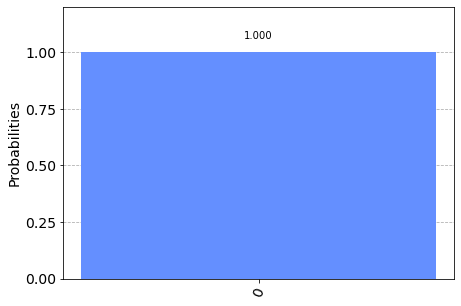

In [5]:
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
obj = sim.run(qobj).result().get_counts()
plot_histogram(obj)

**Measuring |0> in the state |->**

In [6]:
qc = QuantumCircuit(1,1)
int = [1/sqrt(2), -1/sqrt(2)]
qc.initialize(int,0)
x_measurement(qc, 0, 0)
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

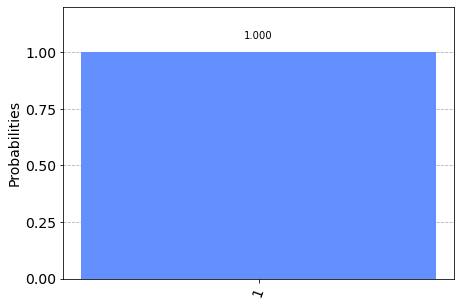

In [7]:
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
obj = sim.run(qobj).result().get_counts()
plot_histogram(obj)

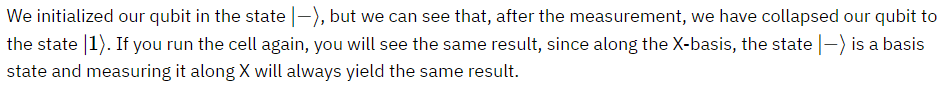

In [8]:
#Q 1.4(9) Try to create a function that measures in the Y-basis

In [9]:
# Ans. We want a gate that performs the transformation{1 in Y basis}
# 1/sqrt(2) [1-i] to [01]
# This can be achieved by a S^+ gates, followed by H gate.
# Next we measure it in the Z basis and then reverse the process by applying H gate and a sequence of S gate.

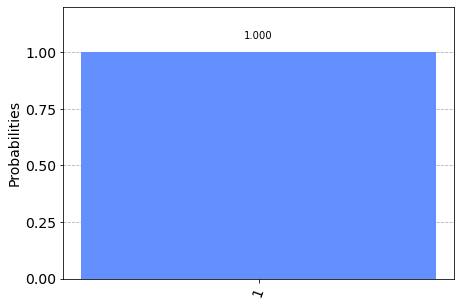

In [11]:
def y_measure(qc, qubit, cbit):
    qc.sdg(qubit)
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    qc.s(qubit)
    
qc = QuantumCircuit(1,1)
initial_state = [1/sqrt(2), -1j/sqrt(2)]
qc.initialize(initial_state, 0)
y_measure(qc, 0,0)

sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
obj = sim.run(qobj).result().get_counts()
plot_histogram(obj)